In [38]:
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Regresion logistica: One vs. All

Base de datos de 5000 numeros, de 20x20 pixeles: el trabajo nos presenta la necesidad de armar un modelo de regresion logistica para poder predecir los disintos numeros del 1 al 10 de la base de datos: para lograrlo se implementaria una funcion de costo, el gradiente de la misma y se usaran algoritmos de la libreria scypi para minimizar los parametros


In [39]:
data = loadmat("ex3data1.mat")
X = data["X"]
y = data["y"]

In [40]:
#5000 filas que representan numeros del 0-9, y 400 columnas que representan la intensidad luminica de cada pixel
X.shape

(5000, 400)

In [41]:
y.shape

(5000, 1)

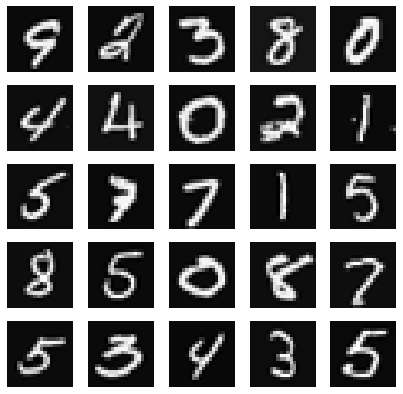

In [42]:
#Graficamos algunos numeros aleatorios del dataset
_, axarr = plt.subplots(5,5,figsize=(7,7))
plt.gray()
for i in range(5):
    for j in range(5):
        axarr[i,j].imshow(X[np.random.randint(X.shape[0])].reshape((20,20), order = "F"))
        axarr[i,j].axis('off') 

In [43]:
def sigmoid(z):
    """
    G = sigmoid function, devuelve probabilidad dado h arbitrario.
    """
    h = 1/(1+np.exp(-z))
    return h

In [44]:
def costFunctionReg(theta, X, y, lmbda):
    """
    J = cost function (loss function), devuelve el error.
    """
    m = len(y)
    temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))
    temp2 = np.multiply(1-y, np.log(1-sigmoid(np.dot(X, theta))))
    return np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

In [45]:
def gradRegularization(theta, X, y, alpha):
    """
    Gradiente de la funcion de costo. Se utiliza en el algoritmo para encontrar los parametros que
    minimizan J.
    """
    m = len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * alpha / m
    temp[0] = temp[0] - theta[0] * alpha / m
    return temp

In [46]:
#Agregar columnas de 1's y asignamos (m,n) las dimensiones de la matriz X.
X = np.insert(X,0,1, axis = 1)
(m, n) = X.shape

In [47]:
#Algoritmo que minimiza J.
learning_rate = 0.1
k = 10
theta = np.zeros((k,n)) 
for i in range(k):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = costFunctionReg, x0 = theta[i],  fprime = gradRegularization, 
                           args = (X, (y == digit_class).flatten(), learning_rate), maxiter = 500)

Optimization terminated successfully.
         Current function value: 0.008587
         Iterations: 95
         Function evaluations: 363
         Gradient evaluations: 363
Optimization terminated successfully.
         Current function value: 0.013127
         Iterations: 100
         Function evaluations: 386
         Gradient evaluations: 386
Optimization terminated successfully.
         Current function value: 0.050812
         Iterations: 227
         Function evaluations: 692
         Gradient evaluations: 692
Optimization terminated successfully.
         Current function value: 0.057612
         Iterations: 212
         Function evaluations: 640
         Gradient evaluations: 640
Optimization terminated successfully.
         Current function value: 0.033079
         Iterations: 157
         Function evaluations: 514
         Gradient evaluations: 514
Optimization terminated successfully.
         Current function value: 0.054470
         Iterations: 236
         Function eva

In [48]:
#Precision del modelo. Comapara las predicciones con sus valores reales en y.
pred = np.argmax(X @ theta.T, axis = 1)
pred = [e if e else 10 for e in pred]
np.mean(pred == y.flatten()) * 100

96.46000000000001

Prediction: 2


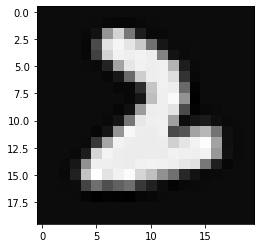

In [49]:
#Se elige aleatoriamente una fila de X, y se predice que numero es aplicando el modelo.
def predictRandomDigit():
    random_digit = X[np.random.randint(X.shape[0])]
    plt.imshow(random_digit[1:].reshape((20, 20), order='F'))
    predicted = np.argmax(sigmoid(np.dot(random_digit, theta.T)))
    print(f"Prediction: {predicted}")

predictRandomDigit()